<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 1, 0, 1]
y_predictions = [0.1, 0.9, 0.4, 0.6, 0.61]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [202]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE

Для того чтобы лучше понимать с какими данными мы будем работать, выведем информацию о пяти случайных записях датасета:

In [6]:
data.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4831,30,100.05,3046.15,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
595,66,104.25,6860.6,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,0
1562,2,29.05,44.75,Female,0,Yes,Yes,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
619,52,19.65,1025.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
2150,29,20.00,540.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0


Построим таблицу количества пропущенных значений для каждого столбца:

In [13]:
missed_values = data.isna().sum(axis = 0)
missed_values

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Выведем информацию о нашем датасете, воспользовавшись методом info:

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заметим, что столбец TotalSpent имеет тип object, хотя должен иметь тип float64. Значит, в этом столбце содержатся "мусорные" значения, избавимся от них, заменив на медиану значений столбца:

In [14]:
# Преобразуем столбец к типу float64, при невозможности преобразования заполним ячейку пустыми значениями (NaN)
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
# Посчитаем медиану по столбцу, игнорируя пустые значения
median = data['TotalSpent'].median()
# Заменим все пустые значения медианой столбца
data['TotalSpent'].fillna(value=median, inplace=True)

Убедимся, что теперь столбец TotalSpent имеет тип float64 и не содержит пустых значений:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заметим также, что столбец IsSeniorCitizen, соответсвующий категориальному признаку имеет тип int64 (значения 0 и 1), преобразуем его в соответствии с другими категориальными признаками (значения 'Yes' и 'No'):

In [16]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном графике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [24]:
# YOUR CODE

Построим гистограммы для числовых признаков и круговые диаграммы для категориальных признаков:

/var/folders/f8/ll_xr8l109v8yrvrs07t5f7m0000gn/T/ipykernel_89181/3622857906.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


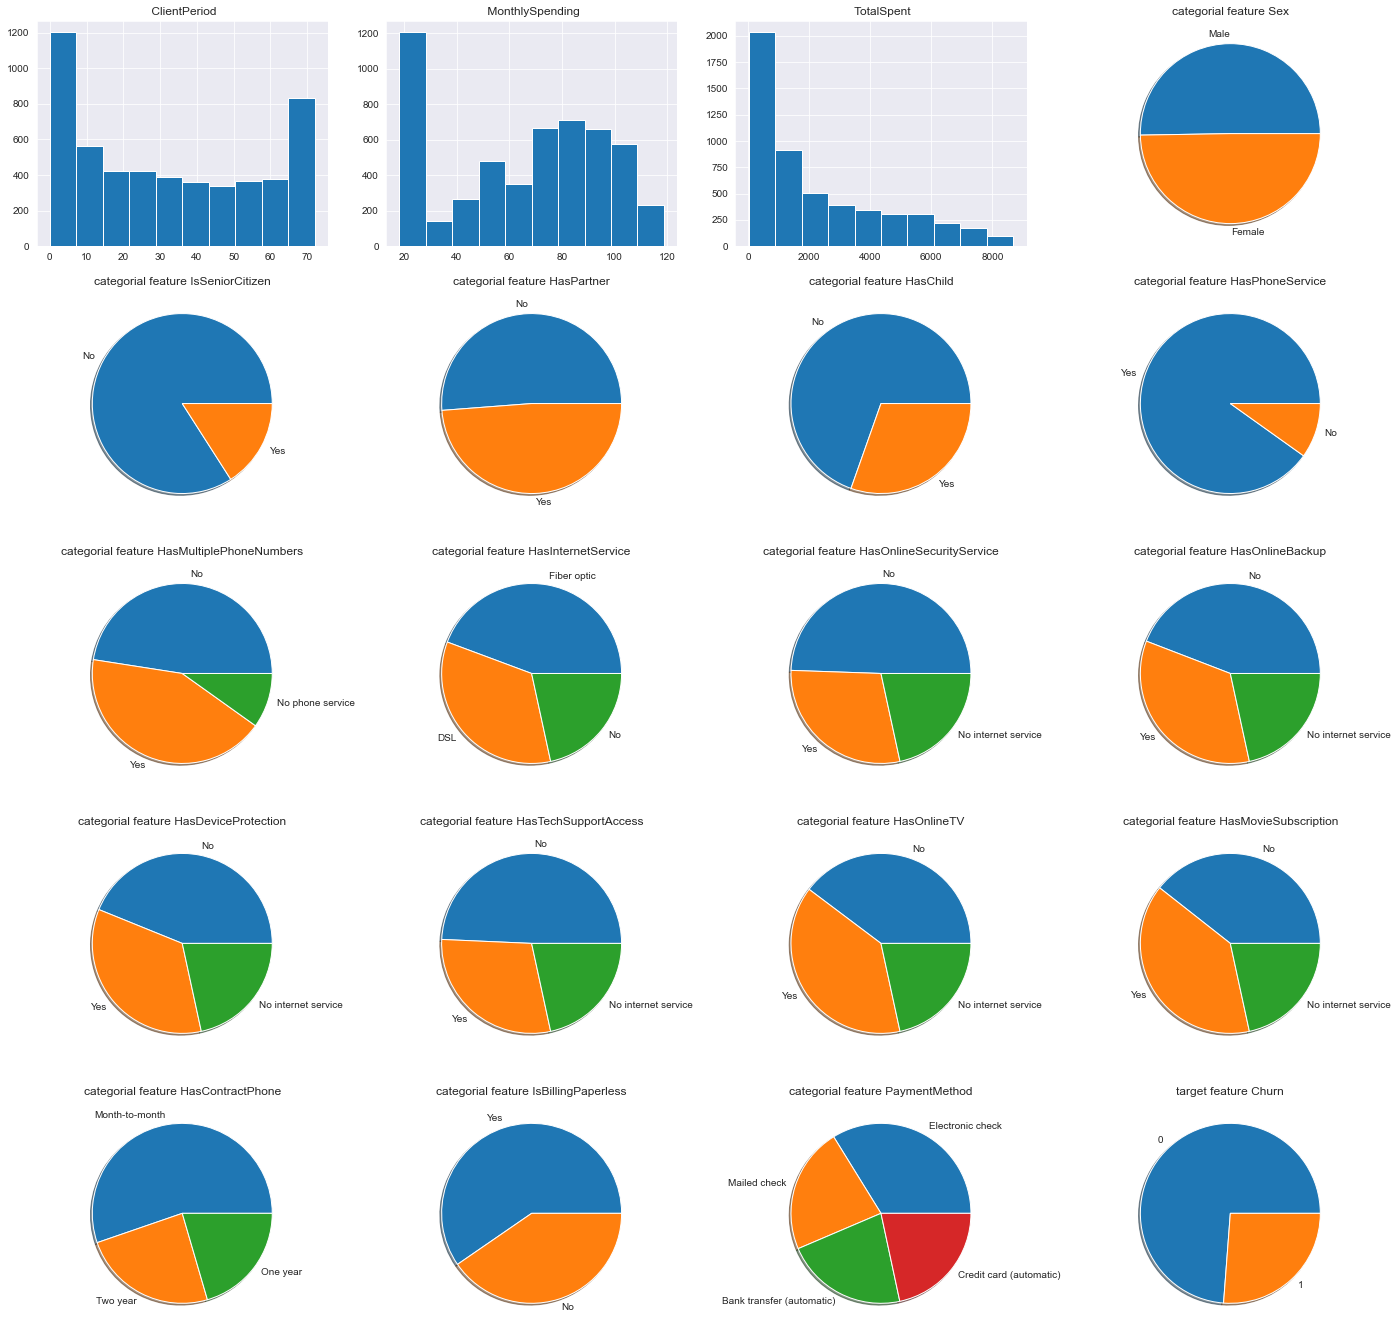

In [77]:
fig, ax = plt.subplots(5, 4, figsize=(24,24))
ax = ax.flatten()
for i, col in enumerate(feature_cols + [target_col]):
    if col in num_cols:
        ax[i].hist(data[col])
        ax[i].set_title(f" {col}")
    else:
        value_counts = data[col].value_counts()
        labels = value_counts.index.tolist()
        values = value_counts.values
        ax[i].set_title(f"categorial feature {col}" if col in cat_cols else f"target feature {col}")
        ax[i].pie(x=values, labels=labels, shadow=True)
fig.show()

На круговой диаграмме, соответствующей целевой переменной заметен дисбаланс классов (~75% удержанных клиентов и ~25% потерянных соответственно). Построим также bar chart для целевой переменной:

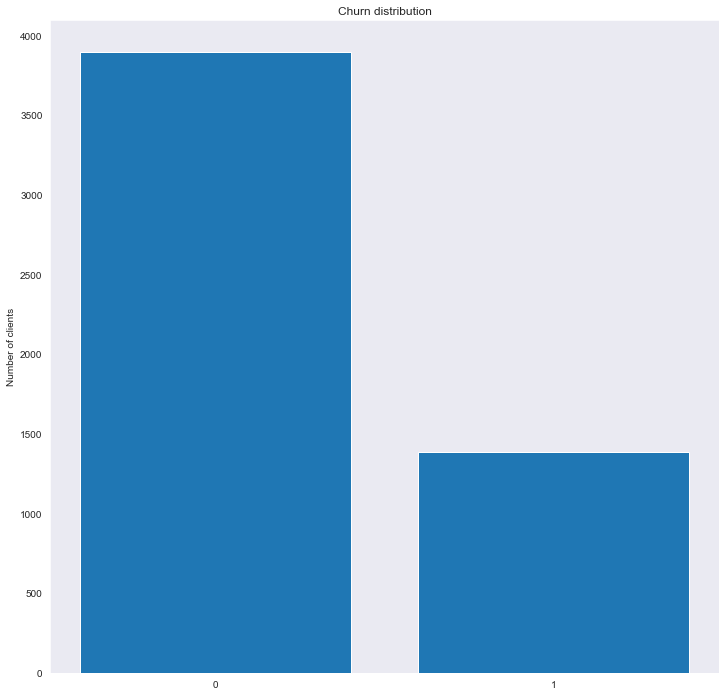

In [104]:
plt.figure(figsize=(12, 12))
value_counts = data[target_col].value_counts()
labels = value_counts.index.tolist()
values = value_counts.values
plt.bar(labels, values)
plt.grid(False)
plt.title('Churn distribution')
plt.ylabel('Number of clients')
plt.xticks(labels)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэкспериментировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

Ошибка в столбце TotalSpent была найдена и исправлена в предыдущем пункте.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно использовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [214]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [ ]:
# YOUR CODE

Разделим датасет на признаки и целевую переменную:

In [135]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Закодируем категориальные признаки при помощи one-hot encoding'a:

In [136]:
X = pd.get_dummies(X, columns=cat_cols)

Отнормируем числовые признаки:

In [131]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [134]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.557323,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.184235,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.976549,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.123552,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970998,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


Разделим данные на train и valid:

In [176]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

Обучим логистическую регрессию (поскольку используется класс LogisticRegressionCV, параметр C подберётся автоматически):

In [177]:
logistic_regression_cv = LogisticRegressionCV(scoring='roc_auc', max_iter=200)
logistic_regression_cv.fit(X_train, y_train)

LogisticRegressionCV(max_iter=200, scoring='roc_auc')

Протестируем обученный классификатор:

In [178]:
y_pred = logistic_regression_cv.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred)

0.8416358435216734

Выпишите какое лучшее качество и с какими параметрами вам удалось получить:
Получили точность 0.8416358435216734

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

In [199]:
import catboost

In [210]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [211]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [228]:
boosting_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]

Learning rate set to 0.035992
0:	learn: 0.6683764	total: 7.01ms	remaining: 3.5s
1:	learn: 0.6470566	total: 12.5ms	remaining: 3.12s
2:	learn: 0.6258279	total: 18.6ms	remaining: 3.08s
3:	learn: 0.6068981	total: 24ms	remaining: 2.98s
4:	learn: 0.5901866	total: 30.1ms	remaining: 2.98s
5:	learn: 0.5752511	total: 35.4ms	remaining: 2.91s
6:	learn: 0.5615973	total: 40.5ms	remaining: 2.85s
7:	learn: 0.5509796	total: 44ms	remaining: 2.71s
8:	learn: 0.5407348	total: 48.9ms	remaining: 2.67s
9:	learn: 0.5298464	total: 54.9ms	remaining: 2.69s
10:	learn: 0.5198660	total: 60.5ms	remaining: 2.69s
11:	learn: 0.5105755	total: 65.8ms	remaining: 2.68s
12:	learn: 0.5032796	total: 68.6ms	remaining: 2.57s
13:	learn: 0.4954888	total: 72.8ms	remaining: 2.53s
14:	learn: 0.4881950	total: 78.2ms	remaining: 2.53s
15:	learn: 0.4818491	total: 83.1ms	remaining: 2.51s
16:	learn: 0.4761116	total: 88ms	remaining: 2.5s
17:	learn: 0.4721520	total: 91.6ms	remaining: 2.45s
18:	learn: 0.4667453	total: 96.9ms	remaining: 2.45s


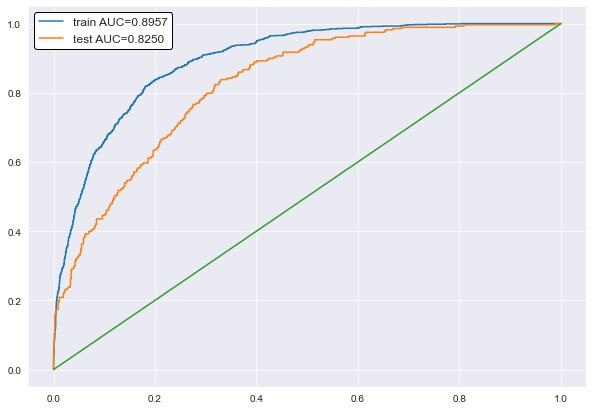

In [229]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_valid, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить:
Получили точность 0.825 (на kaggle лучший результат 0.85181)

# Предсказания

In [230]:
best_model = boosting_model

Загружаем данные:

In [235]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Предобработаем тестовые данные:

In [236]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.